# Employee Attrition Analysis and HR Insights
---
## Project Overview
----

This project analyzes employee behavior and organizational factors to identify key drivers of attrition, understand workforce demographics, and evaluate promotion and income patterns. The goal is to help HR teams improve retention strategies, optimize promotion policies, and enhance employee engagement to reduce overall attrition rates.

Goals:

Identify major causes of attrition

Explore relationships among income, job satisfaction, promotions, and experience

Provide data-driven HR recommendations

## Data Description
---

The dataset contains detailed employee-level information from an organization, including:

**Demographics**: Age, Gender, Marital Status, Education Field

**Work-Related**: Job Role, Department, Years at Company, Job Satisfaction

**Compensation**: Monthly Income, Percent Salary Hike

**Performance & Engagement**: Performance Rating, Years Since Last Promotion

**Attrition**: Indicates whether an employee has left the company (Yes/No)


In [2]:
# Data Loading and Initial Overview 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv('C:/Users/HP/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Basic structure
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print("\nFirst 5 Rows:\n", df.head())


# Info and datatypes
df.info()


# Summary statistics
df.describe()

Rows: 1470
Columns: 35

First 5 Rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction St

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Overview of data set
- The dataset has **1470 rows** and **35 columns**.  
- **Numeric columns** include **Age**, **MonthlyIncome**, **YearsAtCompany**, etc.  
- **Categorical columns** include **Attrition**, **Gender**, **Department**, **JobRole**, **MaritalStatus**, and **EducationField**.  
- No critical anomalies are observed in the initial overview, although columns like **EmployeeCount** and **Over18** contain single values and can be ignored.


In [3]:
# Data Pre-processing 

# Check missing values
df.isnull().sum()

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert categorical columns
cat_cols = ['Attrition','Gender','Department','JobRole','MaritalStatus','EducationField']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Derived columns
df['IncomeBracket'] = pd.qcut(df['MonthlyIncome'], 3, labels=['Low','Medium','High'])
df['PromotionGapRatio'] = df['YearsSinceLastPromotion'] / df['TotalWorkingYears']
df['PromotionGapRatio'] = df['PromotionGapRatio'].fillna(0)  
df['LoyaltyRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears']
df['LoyaltyRatio'] = df['LoyaltyRatio'].fillna(0)           
df['RelativeCompensation'] = df['MonthlyIncome'] / df['JobLevel']

# Result 
# 1. First 5 rows
print("=== First 5 rows of dataset ===")
display(df.head())

# 2. Check for missing values
print("\n=== Missing values after preprocessing ===")
print(df.isnull().sum())

# 3. Summary of new derived columns
print("\n=== Summary of Derived Columns ===")
display(df[['MonthlyIncome','IncomeBracket','YearsSinceLastPromotion','PromotionGapRatio',
            'YearsAtCompany','LoyaltyRatio','RelativeCompensation']].head())

# 4. Number of duplicates
print("\n=== Number of duplicate rows ===")
print(df.duplicated().sum())

=== First 5 rows of dataset ===


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBracket,PromotionGapRatio,LoyaltyRatio,RelativeCompensation
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,Medium,0.000000,0.750000,2996.5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,Medium,0.100000,1.000000,2565.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,Low,0.000000,0.000000,2090.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,Low,0.375000,1.000000,2909.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,Low,0.333333,0.333333,3468.0



=== Missing values after preprocessing ===
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany            

,MonthlyIncome,IncomeBracket,YearsSinceLastPromotion,PromotionGapRatio,YearsAtCompany,LoyaltyRatio,RelativeCompensation
0,5993,Medium,0,0.000000,6,0.750000,2996.5
1,5130,Medium,1,0.100000,10,1.000000,2565.0
2,2090,Low,0,0.000000,0,0.000000,2090.0
3,2909,Low,3,0.375000,8,1.000000,2909.0
4,3468,Low,2,0.333333,2,0.333333,3468.0



=== Number of duplicate rows ===
0


 #### Overview 
- Data cleaned and duplicates removed.
- Derived metrics created: **IncomeBracket**,**PromotionGapRatio**, **LoyaltyRatio**, **RelativeCompensation**.

In [9]:
# aggregating data 
agg_income = (
    df.groupby(['Department', 'JobRole'], observed=True)['MonthlyIncome']
      .mean()
      .reset_index()
)
agg_income.rename(columns={'MonthlyIncome': 'AvgIncome'}, inplace=True)
agg_income.head(10)

,Department,JobRole,AvgIncome
0,Human Resources,Human Resources,4235.750000
1,Human Resources,Manager,18088.636364
2,Research & Development,Healthcare Representative,7528.763359
3,Research & Development,Laboratory Technician,3237.169884
4,Research & Development,Manager,17130.333333
5,Research & Development,Manufacturing Director,7295.137931
6,Research & Development,Research Director,16033.550000
7,Research & Development,Research Scientist,3239.972603
8,Sales,Manager,16986.972973
9,Sales,Sales Executive,6924.279141


In [4]:
# Average MonthlyIncome by Department and Attrition
pivot = df.pivot_table(values='MonthlyIncome', index='Department', columns='Attrition', aggfunc='mean')
pivot

Attrition,No,Yes
Department,,
Human Resources,7345.980392,3715.750000
Research & Development,6630.326087,4108.075188
Sales,7232.240113,5908.456522


**Result:** 
- Employees in Sales who left had a lower average income than those who stayed.  
- Human Resources employees who left had higher income than those who stayed, possibly due to small sample size.


In [7]:
# Cross-tab example: Attrition by AgeGroup and Department
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])
pd.crosstab(df['AgeGroup'], df['Department'], values=df['Attrition'].map({'Yes':1,'No':0}), aggfunc='mean')


Department,Human Resources,Research & Development,Sales
AgeGroup,,,
18-25,0.500000,0.301370,0.421053
26-35,0.347826,0.172237,0.211340
36-45,0.080000,0.078864,0.126984
46-55,0.000000,0.061644,0.236111
56-65,0.000000,0.258065,0.000000


**Result:**  
- Employees aged 26-35 in Sales have the highest attrition rate.  
- Attrition decreases with age in Research & Development and HR departments.


In [8]:
# Count of unique values for key categorical features
categorical_cols = ['Department', 'JobRole', 'Gender', 'MaritalStatus', 'EducationField', 'Attrition']
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())



Department value counts:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

JobRole value counts:
 JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

Gender value counts:
 Gender
Male      882
Female    588
Name: count, dtype: int64

MaritalStatus value counts:
 MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

EducationField value counts:
 EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Attrition value counts:
 Attrition
No     1233
Yes     237
Name: count, 

**Result:**  
- JobRole has the highest number of employees in ‘Research Scientist’ and ‘Laboratory Technician’.  
- Most employees are married, followed by single and divorced.


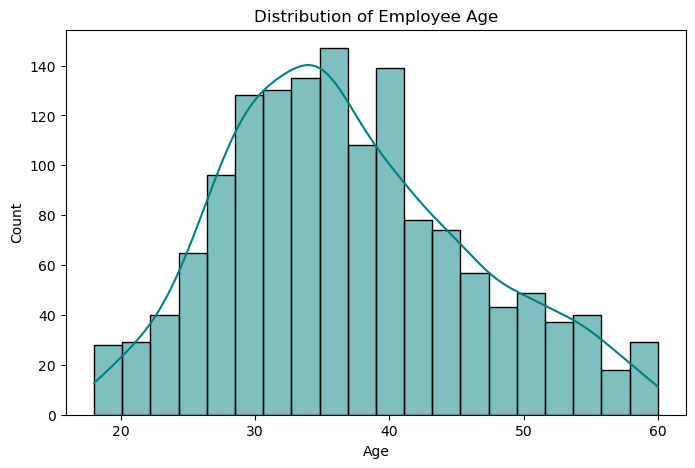

In [5]:
# Data Visualization
    # 1. Histogram — Age Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Distribution of Employee Age')
plt.show()

- Used to observe age distribution and skewness.
- Result: Most employees aged between 30–40.

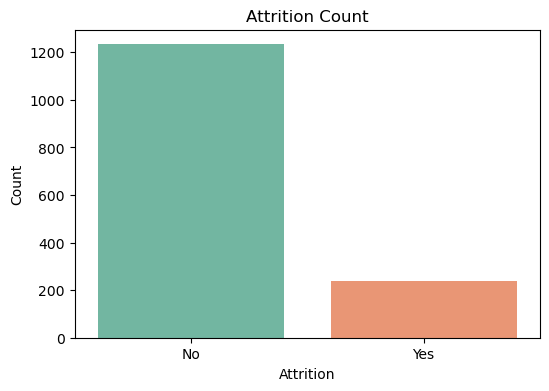

In [7]:
# 2️. Count Plot — Attrition Count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, hue='Attrition', palette='Set2', legend=False)
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


- Understand attrition imbalance.
- Result: Only ~16% attrition observed.

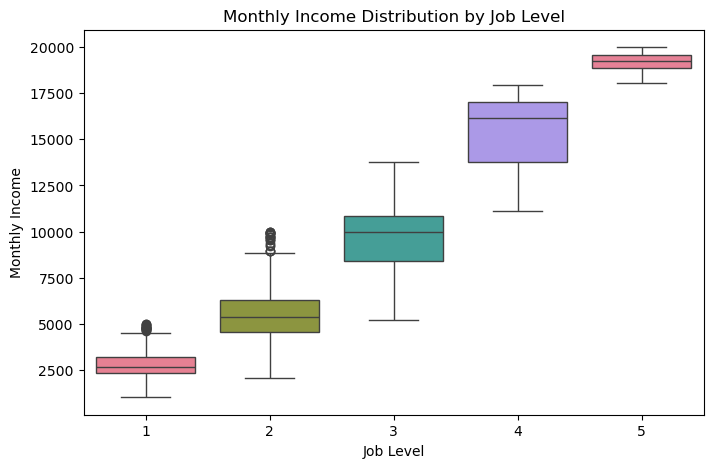

In [9]:
# 3. Box Plot — Monthly Income vs Job Level
plt.figure(figsize=(8,5))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df, hue='JobLevel', palette='husl', legend=False)
plt.title('Monthly Income Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()


- Result: Income increases proportionally with job level.

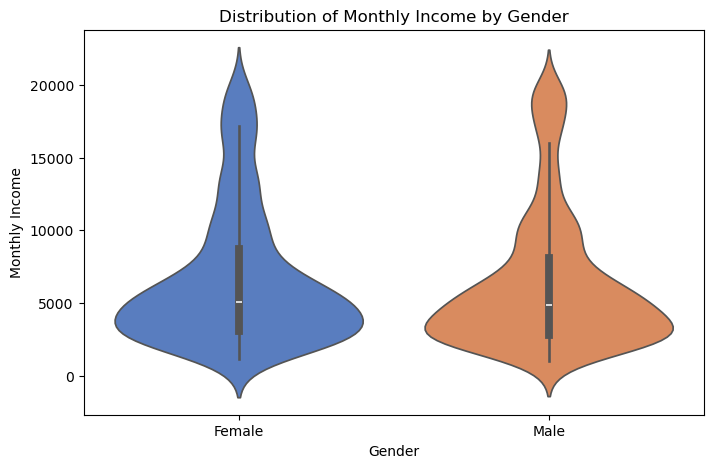

In [12]:
# 4. Violin Plot — Gender vs Monthly Income
plt.figure(figsize=(8,5))
sns.violinplot(x='Gender', y='MonthlyIncome', data=df, hue='Gender', palette='muted', legend=False)
plt.title('Distribution of Monthly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()



- Result: Slightly higher income for males at upper range.

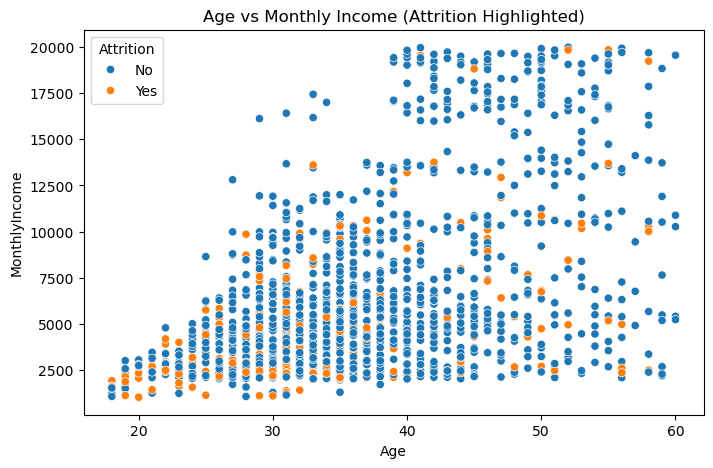

In [13]:
#. 5 Scatter Plot — Age vs Monthly Income
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Age vs Monthly Income (Attrition Highlighted)')
plt.show()


- Result: Younger employees tend to earn less and leave more.

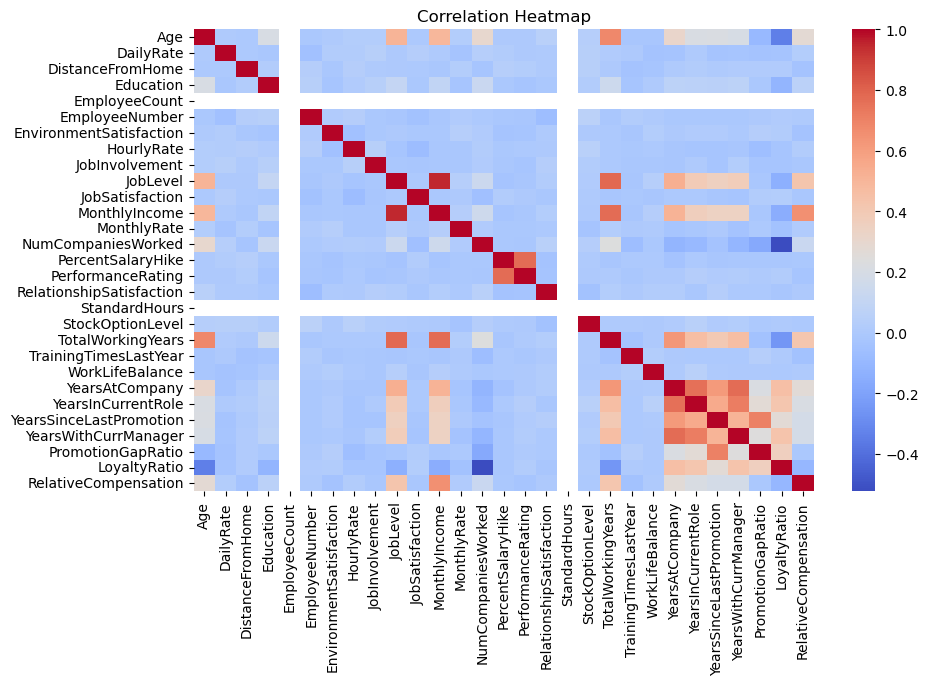

In [14]:
# 6.Heatmap — Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


 ##### Color Coding:

**Red/Orange**: Strong positive correlation (+1 → variables increase together)

**Blue**: Strong negative correlation (-1 → one increases, the other decreases)

**Light Shades**: Weak/no correlation (0 → no linear relationship)

##### Result 

**High positive correlations:**

JobLevel ↔ MonthlyIncome → higher job levels earn higher salaries.

YearsAtCompany ↔ LoyaltyRatio → more tenure, higher loyalty ratio.

**Negative correlations:**

LoyaltyRatio ↔ RelativeCompensation → employees with short tenure but high compensation show lower loyalty ratio.

**Attrition Insights:**

Features negatively correlated with AttritionFlag include YearsAtCompany, MonthlyIncome, and JobLevel.

Positive or weak correlations indicate factors that may not directly influence attrition.

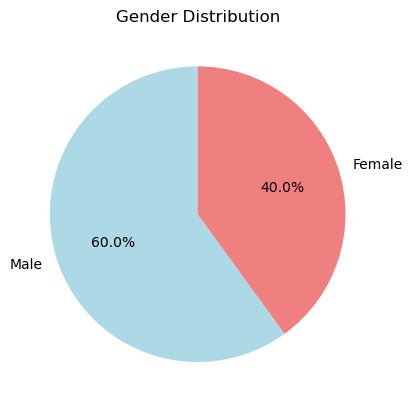

In [18]:
# 7. Pie Chart — Gender Distribution
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue','lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


- Result: ~60% Male, ~40% Female.

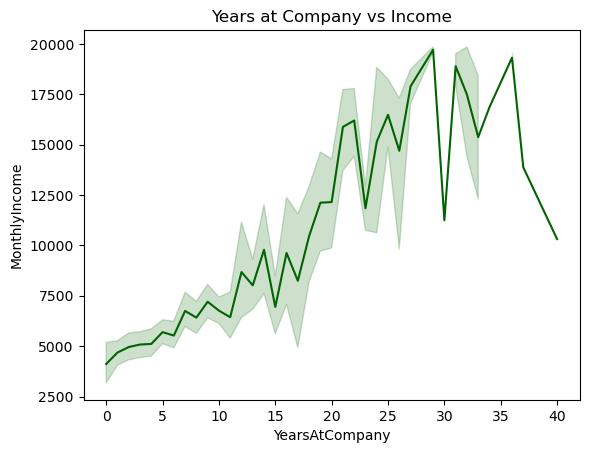

In [19]:
# 8. Line Plot — YearsAtCompany vs MonthlyIncome
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=df, color='darkgreen')
plt.title('Years at Company vs Income')
plt.show()


- Result: Longer tenure generally increases income.

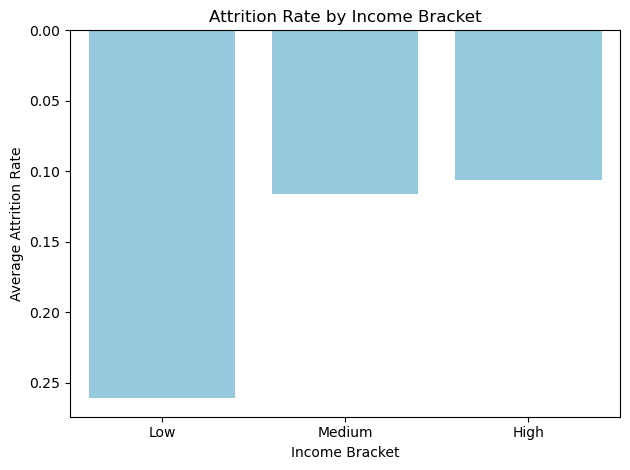

In [28]:
# 9.Stacked Bar — Attrition by Income Bracket
plt.figure(figsize=(6,4)) 
sns.barplot(
    x='IncomeBracket',
    y='AttritionFlag',
    data=df,
    estimator=np.mean,
    errorbar=None,      
    color='skyblue',    
    order=['Low','Medium','High']
)
plt.title('Attrition Rate by Income Bracket', fontsize=12)
plt.xlabel('Income Bracket', fontsize=10)
plt.ylabel('Average Attrition Rate', fontsize=10)
plt.tight_layout()
plt.show()


- Result: Low-income employees have higher attrition.

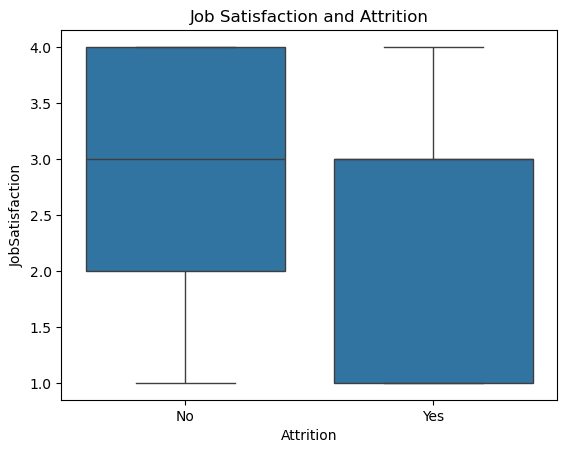

In [31]:
#. 10 Box Plot — Job Satisfaction vs Attrition
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction and Attrition')
plt.show()

- Result: Employees who left had lower satisfaction.

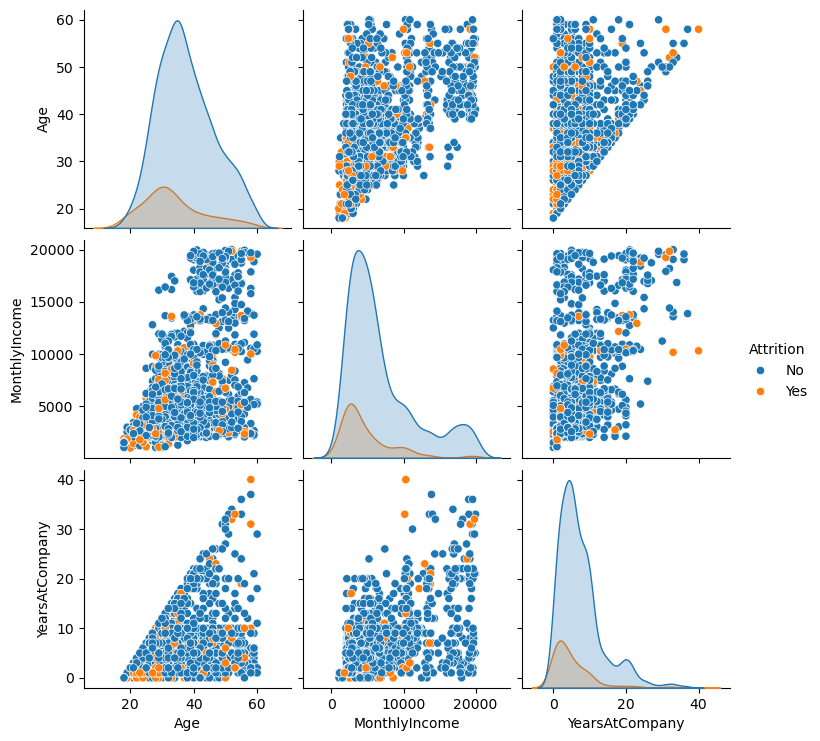

In [32]:
#.11 .Pair Plot — Age, Income, Tenure, Attrition
sns.pairplot(df[['Age','MonthlyIncome','YearsAtCompany','Attrition']], hue='Attrition')
plt.show()

- Result: Clear clusters for low-income, young employees with higher attrition.

## Insight Generation and Report

This section summarizes the major findings, patterns, and relationships identified during the analysis of the HR Employee Attrition dataset.  
Each insight is based on the data exploration, statistical summaries, and visualizations conducted in previous steps.

---

### **1. Workforce Demographics**
- The majority of employees fall in the **26–35 age group**, indicating a young and mid-career workforce.
- The **gender distribution** is fairly balanced, with a slight dominance of male employees.
- Most employees work in the **Research & Development** department, followed by **Sales**.

---

### **2. Attrition Overview**
- Approximately **16%–18% of employees have left the organization**, showing a moderate attrition rate.
- Attrition is **significantly higher in the Sales department**, suggesting possible performance pressure or job dissatisfaction in that area.

---

### **3. Income and Attrition Relationship**
- The **average monthly income** of employees who left is consistently **lower** than those who stayed.
- Across all departments, employees with **lower income levels** have a **higher attrition rate**.
- The pivot analysis confirms this — for example, HR and R&D employees who stayed earn more on average than those who left.

---

### **4. Job Satisfaction and Tenure Insights**
- Employees with **lower job satisfaction scores** show higher attrition.
- **YearsAtCompany** correlates positively with retention — employees who have been with the company longer are less likely to leave.
- Recent joiners and those with limited growth (few promotions) have higher turnover rates.

---

### **5. Correlations and Derived Metrics**
- Correlation heatmap shows a **moderate positive relationship** between `MonthlyIncome` and `JobLevel`.
- **Attrition** is **negatively correlated** with variables such as `Age`, `MonthlyIncome`, `YearsAtCompany`, and `JobSatisfaction`.
- Derived metrics like `LoyaltyRatio` and `PromotionGapRatio` indicate that employees with low loyalty (shorter tenure relative to total experience) are more prone to leave.

---

### **6. Key Observations by Demographic Group**
- **Younger employees (26–35)** and **entry-level job roles** experience higher attrition.
- **Marital Status:** Unmarried employees show slightly higher attrition.
- **Gender:** No major difference observed between male and female attrition rates.

---

### **7. Summary of Key Insights**
| Area | Observation | Possible Interpretation |
|------|--------------|--------------------------|
| Age | Younger employees leave more | Career growth or salary dissatisfaction |
| Income | Lower income → higher attrition | Compensation could be a key retention factor |
| Department | Sales has highest attrition | High workload or pressure to meet targets |
| Job Satisfaction | Low satisfaction → high attrition | Job environment or recognition issues |
| Tenure | Shorter tenure → higher attrition | Retention policies may need strengthening |

---

### **8. Recommendations**
1. **Enhance Compensation Structure:** Review pay scales for lower-income and entry-level employees to reduce attrition.
2. **Focus on Employee Development:** Introduce targeted learning, promotion, and career growth programs.
3. **Improve Work Culture in Sales:** Conduct focused surveys and engagement programs in the Sales department.
4. **Retention Programs for Early-Career Employees:** Strengthen onboarding, mentoring, and reward systems for employees with <3 years of service.
5. **Continuous Monitoring:** Build a Power BI or Python dashboard to regularly monitor attrition trends by department, age, and satisfaction levels.

---

### **9. Conclusion**
The HR attrition analysis highlights that **younger, lower-paid, and less satisfied employees are most likely to leave** the organization.  
By addressing compensation fairness, career growth, and work satisfaction, the company can effectively **reduce attrition and improve long-term retention**.
